In [4]:
import sys  
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib_inline
import matplotlib as mpl

sys.path.insert(0, '../../')
from statlearn.smoothing import BSpline

%matplotlib inline
%load_ext autoreload
%autoreload 2
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
rcParams = {
    'font.family' : 'Latin Modern Math',
    'font.size': 12,
    'axes.linewidth' : 1.5,
    'mathtext.fontset' : 'stix'
}
mpl.rcParams.update(rcParams)

# B-splines

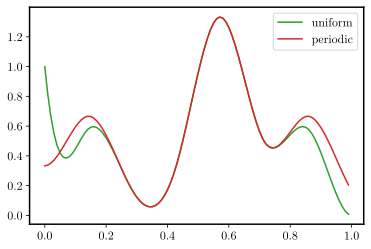

In [167]:
n = 10
p = 3
uniform_bspline = BSpline(p, n=n, type='uniform')
periodic_bspline = BSpline(p, n=n, type='periodic')
controls = np.array([1, 0, 1, 0, 0, 2, 0, 1, 0 ,0])

X = np.linspace(0, 0.99,  100)
y_u = uniform_bspline.get_spline(X, controls)
y_p = periodic_bspline.get_spline(X, controls)
plt.plot(X, y_u, label='uniform', color='C2')
plt.plot(X, y_p, label='periodic', color='C3')
plt.legend()
plt.show()

## B-splines curve fitting

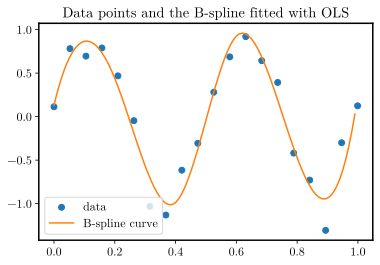

In [166]:
# generate the data
m = 20
X = np.linspace(0, 0.999, m)
y = np.sin(4 * X * np.pi) + norm.rvs(size=m, loc=0, scale=0.2)

# set the B-spline parameters
n = 8  # number of control points
p = 3  # degree of the curves
bspline = BSpline(p=p, n=n, type='periodic')

# fit the curve
bspline.fit(X, y)
y_fit = bspline.fit_transform(X, y)
x_axs = np.linspace(0, 0.99, 100)
y_pred = bspline.predict(x_axs)

# plot the results
fig, ax  = plt.subplots()
ax.scatter(X, y, label = 'data')
ax.plot(x_axs, y_pred, color='C1', label='B-spline curve')
ax.legend()
ax.set_title("Data points and the B-spline fitted with OLS")
plt.show()


In [178]:
import plotly.graph_objs as go
from ipywidgets import interact

# generate the data
m = 15
X = np.linspace(0, 1, m, endpoint=False)
y = 4 * np.sin((X * np.pi) ** 2) + norm.rvs(size=m, loc=0, scale=1)

# create plotly figure with widgets
fig = go.FigureWidget()
fig.add_trace(go.Scatter(name='fitted B-spline'))

xs = np.linspace(0, 1, 100, endpoint=False)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
@interact(n=(5, 10, 1), p=(0, 4, 1), type=['uniform', 'periodic'])
def update(n=6, p=3, type='uniform'):
    with fig.batch_update():
        bspline = BSpline(p=p, n=n, type=type)
        bspline.fit(X, y)
        x_axs = np.linspace(0, 0.99, 100)
        y_pred = bspline.predict(x_axs)
        fig.data[0].x=xs
        fig.data[0].y=y_pred
        fig.data[0].line.color = colors[1]

fig.add_trace(go.Scatter(x=X, y=y, mode='markers', name='data'))
fig.data[1].marker.color = colors[0]
fig.update_xaxes(
    range=[0 - 0.1, 1 + 0.1], gridcolor='lightgrey', zeroline=False)
fig.update_yaxes(
    range=[y.min() - 2, y.max() + 2], gridcolor='lightgrey', zeroline=False)
fig.update_layout(
    paper_bgcolor='white', 
    plot_bgcolor='#f5f5f5', 
    title='B-splines curve fitting', 
    title_x=0.5, font_family='Avenir'
)
fig

interactive(children=(IntSlider(value=6, description='n', max=10, min=5), IntSlider(value=3, description='p', …

FigureWidget({
    'data': [{'line': {'color': '#ff7f0e'},
              'name': 'fitted B-spline',
          …